## BERT Mask Langauge Modelling

BERT is a langauge model trained with two tasks:
1. Masked Language Model (MLM) 

2. Next Sentence Prediction (NSP)

The model is trained on a large corpus of text data. The model is then fine-tuned on a specific task.

### 1. Masked Language Model (MLM)

To understand how Masked Language Modeling (MLM) instills language understanding in pretrained language models, let's take a closer look at the process.

In MLM, a certain percentage of words in the input text are randomly masked. The model's task is to predict the original masked words based on the context provided by the surrounding words. By training on this task, the model learns to understand the relationships between words and their context.

This process helps the pretrained language model to capture various linguistic patterns, such as syntax, semantics, and word relationships. It enables the model to learn the statistical properties of the language and develop a deeper understanding of grammar, word usage, and contextual meaning.

By training on a large corpus of text data, the pretrained language model becomes proficient in predicting masked words accurately. This proficiency in MLM contributes to the model's ability to perform a wide range of downstream natural language processing tasks, such as text classification, named entity recognition, sentiment analysis, and machine translation.

Overall, MLM plays a crucial role in instilling language understanding in pretrained language models by training them to predict masked words based on contextual information, thereby enabling them to grasp the intricacies of language and perform well on various language-related tasks.


In [1]:
import torch
from transformers import BertForMaskedLM, BertTokenizer


In [3]:
# Load pre-trained model tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Load pre-trained model
model = BertForMaskedLM.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [4]:
text = "I really [MASK] the movie. It was quite interesting."

inputs = tokenizer(text, return_tensors='pt')

print(f"MASK token id: {tokenizer.mask_token_id}")
print(inputs)

MASK token id: 103
{'input_ids': tensor([[ 101, 1045, 2428,  103, 1996, 3185, 1012, 2009, 2001, 3243, 5875, 1012,
          102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}


In [5]:
output = model(**inputs)

In [11]:
inputs['input_ids'].shape

torch.Size([1, 13])

In [7]:
output["logits"].shape

torch.Size([1, 13, 30522])

In [8]:
output['logits'][0,3]

tensor([-2.4959, -2.7215, -2.6483,  ..., -3.4210, -2.0716, -3.0220],
       grad_fn=<SelectBackward0>)

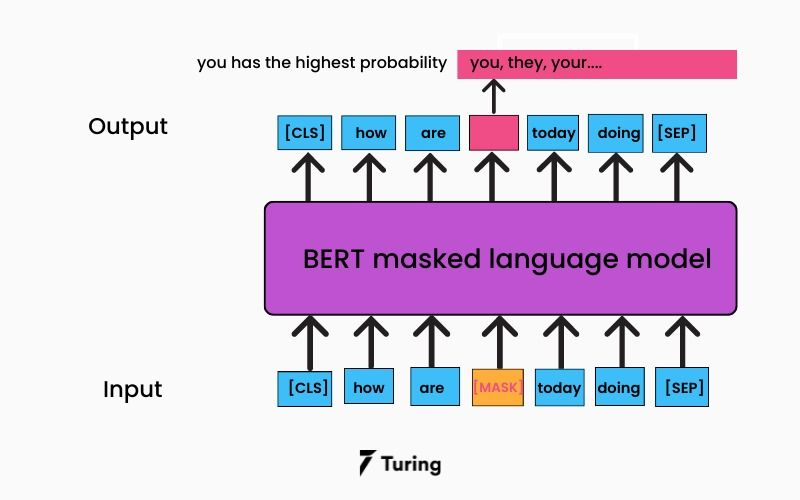

In [12]:

predicted_index = output['logits'][0,3].argmax()
print(predicted_index)

tensor(5632)


In [13]:
predicted_token = tokenizer.convert_ids_to_tokens([predicted_index])[0]
print(predicted_token)

enjoyed


In [17]:
#"I really [MASK] the movie. It was quite interesting."
ranked_list = output['logits'][0,3].argsort(descending=True)
for i in range(5):
    predicted_token = tokenizer.convert_ids_to_tokens([ranked_list[i]])[0]
    print(predicted_token)

enjoyed
liked
loved
enjoy
like
